In [1]:
import pandas as pd
import missingno as msno

df =pd.read_csv("datasets/SpeedDatingData.csv", dtype=str)

In [2]:
df['career_c']=df['career_c'].fillna("0")
df['field_cd']=df['field_cd'].fillna("0")

In [3]:
df['career_c']=df['career_c'].astype('float64').astype('int64').astype(str)
df['field_cd']=df['field_cd'].astype('float64').astype('int64').astype(str)

MODIFICATION DES VALEURS DES COLONNES

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
mapping_values ={       "gender":{"0":"Female",
                                  "1":"Male"},
                 
                    "condtn":{
                            "1":"limited choice",
                            "2":"extensive choice"},

                    "match":{"1":"Yes",
                             "0":"No"},
                    
                     "samerace":{"1":"Yes",
                             "0":"No"},

                        "field_cd":{
                            "1":"Law",
                            "2":"Math",
                            "3":"Social Science, Psychologist",
                            "4":"Medical Science, Pharmaceuticals, and Bio Tech", 
                            "5":"Engineering",
                            "6":"English/Creative Writing/ Journalism",
                            "7":"History/Religion/Philosophy", 
                            "8":"Business/Econ/Finance",
                            "9":"Education, Academia",
                            "10":"Biological Sciences/Chemistry/Physics",
                            "11":"Social Work",
                            "12":"Undergrad/undecided",
                            "13":"Political Science/International Affairs",
                            "14":"Film",
                            "15":"Fine Arts/Arts Administration",
                            "16":"Languages",
                            "17":"Architecture",
                            "18":"Other"},

                        "race":{
                            "1":"Black/African American",
                            "2":"European/Caucasian-American",
                            "3":"Latino/Hispanic American",
                            "4":"Asian/Pacific Islander/Asian-American",
                            "5":"Native American",
                            "6":"Other"},
                        "goal":{
                            "1":"Seemed like a fun night out",
                            "2":"To meet new people",
                            "3":"To get a date",
                            "4":"Looking for a serious relationship",
                             "5":"To say I did it",
                            "6":"Other"
                        },
                        "date":{
                            "1":"Several times a week",
                            "2":"Twice a week",
                            "3":"Once a week",
                            "4":"Twice a month",
                            "5":"Once a month",
                            "6":"Several times a year",
                            "7":"Almost never",
                        },
                        "go_out":{
                            "1":"Several times a week",
                            "2":"Twice a week",
                            "3":"Once a week",
                            "4":"Twice a month",
                            "5":"Once a month",
                            "6":"Several times a year",
                            "7":"Almost never",
                        },
                        "career_c":{
                            "1":"Lawyer",
                            "2":"Academic/Research",
                            "3":"Psychologist",
                            "4":"Doctor/Medicine", 
                            "5":"Engineer", 
                            "6":"Creative Arts/Entertainment", 
                            "7":"Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin", 
                            "8":"Real Estate",
                            "9":"International/Humanitarian Affairs",
                            "10":"Undecided ",
                            "11":"Social Work",
                            "12":"Speech Pathology",
                            "13":"Politics",
                            "14":"Pro sports/Athletics",
                            "15":"Other",
                            "16":"Journalism",
                            "17":"Architecture"
                        },
                        "dec":{"1":"Yes",
                               "0":"No"},
                        "dec_o":{"1":"Yes",
                               "0":"No"},
                    
                        "met":{"1":"Yes",
                               "0":"No"},
                        "date_3":{"1":"Yes",
                                    "2":"No"},


                        "length":{"1":"Too little",
                                   "2":"Too much",
                                    "3":"Just Right"},
                        "numdat_2":{"1":"Too few",
                        "2":"Too many",
                        "3":"Just right"},


}

In [6]:
for k in mapping_values.keys():
    df[k] = df[k].apply(lambda x: mapping_values.get(k).get(x))

RENOMMAGE DES COLONNES 

In [7]:
col_names = {"iid":"Partner IID","id":"Partner ID","gender":"Gender","condtn":"Condition of choice","wave":"Wave","round":"Number of people in wave","position":"Station number when met",
             "positin1":"Station number where started","order":"Number of the date","partner":"Partner2 ID","pid":"Partner2 IID",
             "match":"Match","samerace":"Same race","age_o":"Partner2 Age","race_o":"Partner2 Race","dec_o":"Partner2 Decision",
             "int_corr":"Correlation of interests","attr_o":"Partner2 Rating",

            "pf_o_att":"Preference of attractive (date)",
             "pf_o_sin":"Preference of sincere (date)",
             "pf_o_int":"Preference of intelligence (date)",	
             "pf_o_fun":"Preference of fun (date)",	
             "pf_o_amb":"Preference of ambition (date)",	
             "pf_o_sha":"Preference of shared interests (date)",	
             
            "attr_o":"Rating of attractive (date)",
             "sinc_o":"Rating of sincere (date)",
             "intel_o":"Rating of intelligence (date)",	
             "fun_o":"Rating of fun (date)",	
             "amb_o":"Rating of ambition (date)",	
             "shar_o":"Rating of shared interests (date)",	
             "like_o":"Do you like the P2 (date)",	
             "prob_o":"Probability of P2 saying yes (date)",	
             "met_o":"Met P2 before (date)",

             "age":"Age","field":"Field of study","field_cd":"Field coded","undergra":"Undergraduate","mn_sat":"Median SAT score",
             "tuition":"Tuition","race":"Race","imprace":"Importance of race","imprelig":"Importance of religion",
             "from":"From","zipcode":"Zip code","income":"Median income","goal":"Goal for the evening",
             "date":"Frequency of dates","go_out":"Frequency of going out","career":"Intended career","career_c":"Career code",
             "sports":"Interest in playing sports","tvsports":"Interest in watching sports","exercise":"Interest in bodybuilding and exercices",
             "dining":"Interest in dining","museums":"Interest in museums","art":"Interest in art","hiking":"Interest in hiking/camping",
             "gaming":"Interest in gaming","clubbing":"Interest in clubbing","reading":"Interest in reading","tv":"Interest in tv",
             "theater":"Interest in theater","movies":"Interest in movies","concerts":"Interest in concerts","music":"Interest in music",
             "shopping":"Interest in shopping","yoga":"Interest in yoga","exphappy":"How happy do you expect to be","expnum":"Expected number of interested people",
             
            # BEFORE THE DATES
             "attr1_1":"Looking for attractive (before evening)","sinc1_1":"Looking for sincere (before evening)",
             "intel1_1":"Looking for intelligent (before evening)","fun1_1":"Looking for fun (before evening)",
             "amb1_1":"Looking for ambitious (before evening)","shar1_1":"Looking for shared interests (before evening)",
             
             "attr4_1":"Other peers importance for attractive (before evening)","sinc4_1":"Other peers importance for sincere (before evening)",
             "intel4_1":"Other peers importance for intelligent (before evening)","fun4_1":"Other peers importance for fun (before evening)",
             "amb4_1":"Other peers importance for ambitious (before evening)","shar4_1":"Other peers importance for shared interests (before evening)",
             
             "attr2_1":"Opposite sex importance for attractive (before evening)","sinc2_1":"Opposite sex importance for sincere (before evening)",
             "intel2_1":"Opposite sex importance for intelligent (before evening)","fun2_1":"Opposite sex importance for fun (before evening)",
             "amb2_1":"Opposite sex importance for ambitious (before evening)","shar2_1":"Opposite sex importance for shared interests (before evening)",
             
             "attr3_1":"How attractive do you think you are (before evening)","sinc3_1":"How sincere do you think you are (before evening)",
             "intel3_1":"How intelligent do you think you are (before evening)","fun3_1":"How fun do you think you are (before evening)",
             "amb3_1":"How ambitious do you think you are (before evening)","shar3_1":"How shared do you think you are (before evening)",
             
             "attr5_1":"How attractive do you think you are perceived (before evening)","sinc5_1":"How sincere do you think you are perceived (before evening)",
             "intel5_1":"How intelligent do you think you are perceived (before evening)","fun5_1":"How fun do you think you are perceived (before evening)",
             "amb5_1":"How ambitious do you think you are perceived (before evening)","shar5_1":"How shared do you think you are perceived (before evening)",
             
             #THE DATE
             "dec":"Decision partner1","attr":"Rating of attractiveness of P2","sinc":"Rating of sincere of P2",
             "intel":"Rating of intelligence of P2","fun":"Rating of fun of P2","amb":"Rating of ambitious of P2",
             "shar":"Rating of shared interests of P2","like":"How do you like P2","prob":"Prob of P2 saying yes","met":"Have you met this person before",
             "match_es":"Estimated matches",

             #MID_EVENT
             "attr1_s":"How important is attractiveness (mid evening)","sinc1_s":"How important is sincerity (mid evening)",
             "intel1_s":"How important is intelligence (mid evening)","fun1_s":"How important is fun (mid evening)",
             "amb1_s":"How important is ambition (mid evening)","shar1_s":"How important is shared interests (mid evening)",
             
             "attr3_s":"Self rating of attractiveness (mid evening)","sinc3_s":"Self rating of sincerity (mid evening)","intel3_s":"Self rating of intelligence (mid evening)",
             "fun3_s":"Self rating of fun (mid evening)","amb3_s":"Self rating of ambition (mid evening)",

            #AFTER EVENT
             "satis_2":"Satisfaction of people met","length":"4 minutes is","numdat_2":"Number of dates you had was",
             
             "attr7_2":"Importance of attractiveness in decision (after event)","sinc7_2":"Importance of sincerity in decision (after event)",
             "intel7_2":"Importance of intelligence in decision (after event)","fun7_2":"Importance of fun in decision (after event)",
             "amb7_2":"Importance of ambition in decision (after event)","shar7_2":"Importance of shared interests in decision (after event)",

             "attr1_2":"Looking for attractive (after event)","sinc1_2":"Looking for sincere (after event)",
             "intel1_2":"Looking for intelligent (after event)","fun1_2":"Looking for fun (after event)",
             "amb1_2":"Looking for ambitious (after event)","shar1_2":"Looking for shared interests (after event)",

             "attr4_2":"Other peers importance for attractive (after event)","sinc4_2":"Other peers importance for sincere (after event)",
             "intel4_2":"Other peers importance for intelligent (after event)","fun4_2":"Other peers importance for fun (after event)",
             "amb4_2":"Other peers importance for ambitious (after event)","shar4_2":"Other peers importance for shared interests (after event)",

            "attr2_2":"Opposite sex importance for attractive (after event)","sinc2_2":"Opposite sex importance for sincere (after event)",
             "intel2_2":"Opposite sex importance for intelligent (after event)","fun2_2":"Opposite sex importance for fun (after event)",
             "amb2_2":"Opposite sex importance for ambitious (after event)","shar2_2":"Opposite sex importance for shared interests (after event)",
             
             "attr3_2":"How attractive do you think you are (after event)","sinc3_2":"How sincere do you think you are (after event)",
             "intel3_2":"How intelligent do you think you are (after event)","fun3_2":"How fun do you think you are (after event)",
             "amb3_2":"How ambitious do you think you are (after event)",

            "attr5_2":"How attractive do you think you are perceived (after event)","sinc5_2":"How sincere do you think you are perceived (after event)",
             "intel5_2":"How intelligent do you think you are perceived (after event)","fun5_2":"How fun do you think you are perceived (after event)",
             "amb5_2":"How ambitious do you think you are perceived (after event)",
             

            #FOLLOW UP
             "you_call":"How many have you called","them_cal":"How many called you","date_3":"Have you been on a date with a match?",
             "numdat_3":"With how many matches","num_in_3":"How many dates?",

             "attr1_3":"Looking for attractive (follow up)","sinc1_3":"Looking for sincere (follow up)","intel1_3":"Looking for intelligent (follow up)","fun1_3":"Looking for fun (follow up)",
             "amb1_3":"Looking for ambitious (follow up)","shar1_3":"Looking for shared interests (follow up)",
             
             "attr7_3":"Importance of attractiveness in decision (follow up)","sinc7_3":"Importance of sincerity in decision (follow up)",
             "intel7_3":"Importance of intelligence in decision (follow up)","fun7_3":"Importance of fun in decision (follow up)",
             "amb7_3":"Importance of ambition in decision (follow up)","shar7_3":"Importance of shared interests in decision (follow up)",
             
             "attr4_3":"Other peers importance for attractive (follow up)","sinc4_3":"Other peers importance for sincere (follow up)",
             "intel4_3":"Other peers importance for intelligent (follow up)","fun4_3":"Other peers importance for fun (follow up)",
             "amb4_3":"Other peers importance for ambitious (follow up)","shar4_3":"Other peers importance for shared interests (follow up)",

             "attr2_3":"Opposite sex importance for attractive (follow up)","sinc2_3":"Opposite sex importance for sincere (follow up)",
             "intel2_3":"Opposite sex importance for intelligent (follow up)","fun2_3":"Opposite sex importance for fun (follow up)",
             "amb2_3":"Opposite sex importance for ambitious (follow up)","shar2_3":"Opposite sex importance for shared interests (follow up)",
             
             "attr3_3":"How attractive do you think you are (follow up)","sinc3_3":"How sincere do you think you are (follow up)",
             "intel3_3":"How intelligent do you think you are (follow up)","fun3_3":"How fun do you think you are (follow up)",
             "amb3_3":"How ambitious do you think you are (follow up)",

            "attr5_3":"How attractive do you think you are perceived (follow up)","sinc5_3":"How sincere do you think you are perceived (follow up)",
             "intel5_3":"How intelligent do you think you are perceived (follow up)","fun5_3":"How fun do you think you are perceived (follow up)",
             "amb5_3":"How ambitious do you think you are perceived (follow up)"
             
             }

In [8]:
df=df.rename(columns=col_names)

VALEURS MANQUANTES - EXPLORATION

In [9]:
for c in df.columns:
    print(f"Colonne {c} : {df[c].isna().sum()} valeurs nulles")

Colonne Partner IID : 0 valeurs nulles
Colonne Partner ID : 1 valeurs nulles
Colonne Gender : 0 valeurs nulles
Colonne idg : 0 valeurs nulles
Colonne Condition of choice : 0 valeurs nulles
Colonne Wave : 0 valeurs nulles
Colonne Number of people in wave : 0 valeurs nulles
Colonne Station number when met : 0 valeurs nulles
Colonne Station number where started : 1846 valeurs nulles
Colonne Number of the date : 0 valeurs nulles
Colonne Partner2 ID : 0 valeurs nulles
Colonne Partner2 IID : 10 valeurs nulles
Colonne Match : 0 valeurs nulles
Colonne Correlation of interests : 158 valeurs nulles
Colonne Same race : 0 valeurs nulles
Colonne Partner2 Age : 104 valeurs nulles
Colonne Partner2 Race : 73 valeurs nulles
Colonne Preference of attractive (date) : 89 valeurs nulles
Colonne Preference of sincere (date) : 89 valeurs nulles
Colonne Preference of intelligence (date) : 89 valeurs nulles
Colonne Preference of fun (date) : 98 valeurs nulles
Colonne Preference of ambition (date) : 107 valeurs

<Axes: >

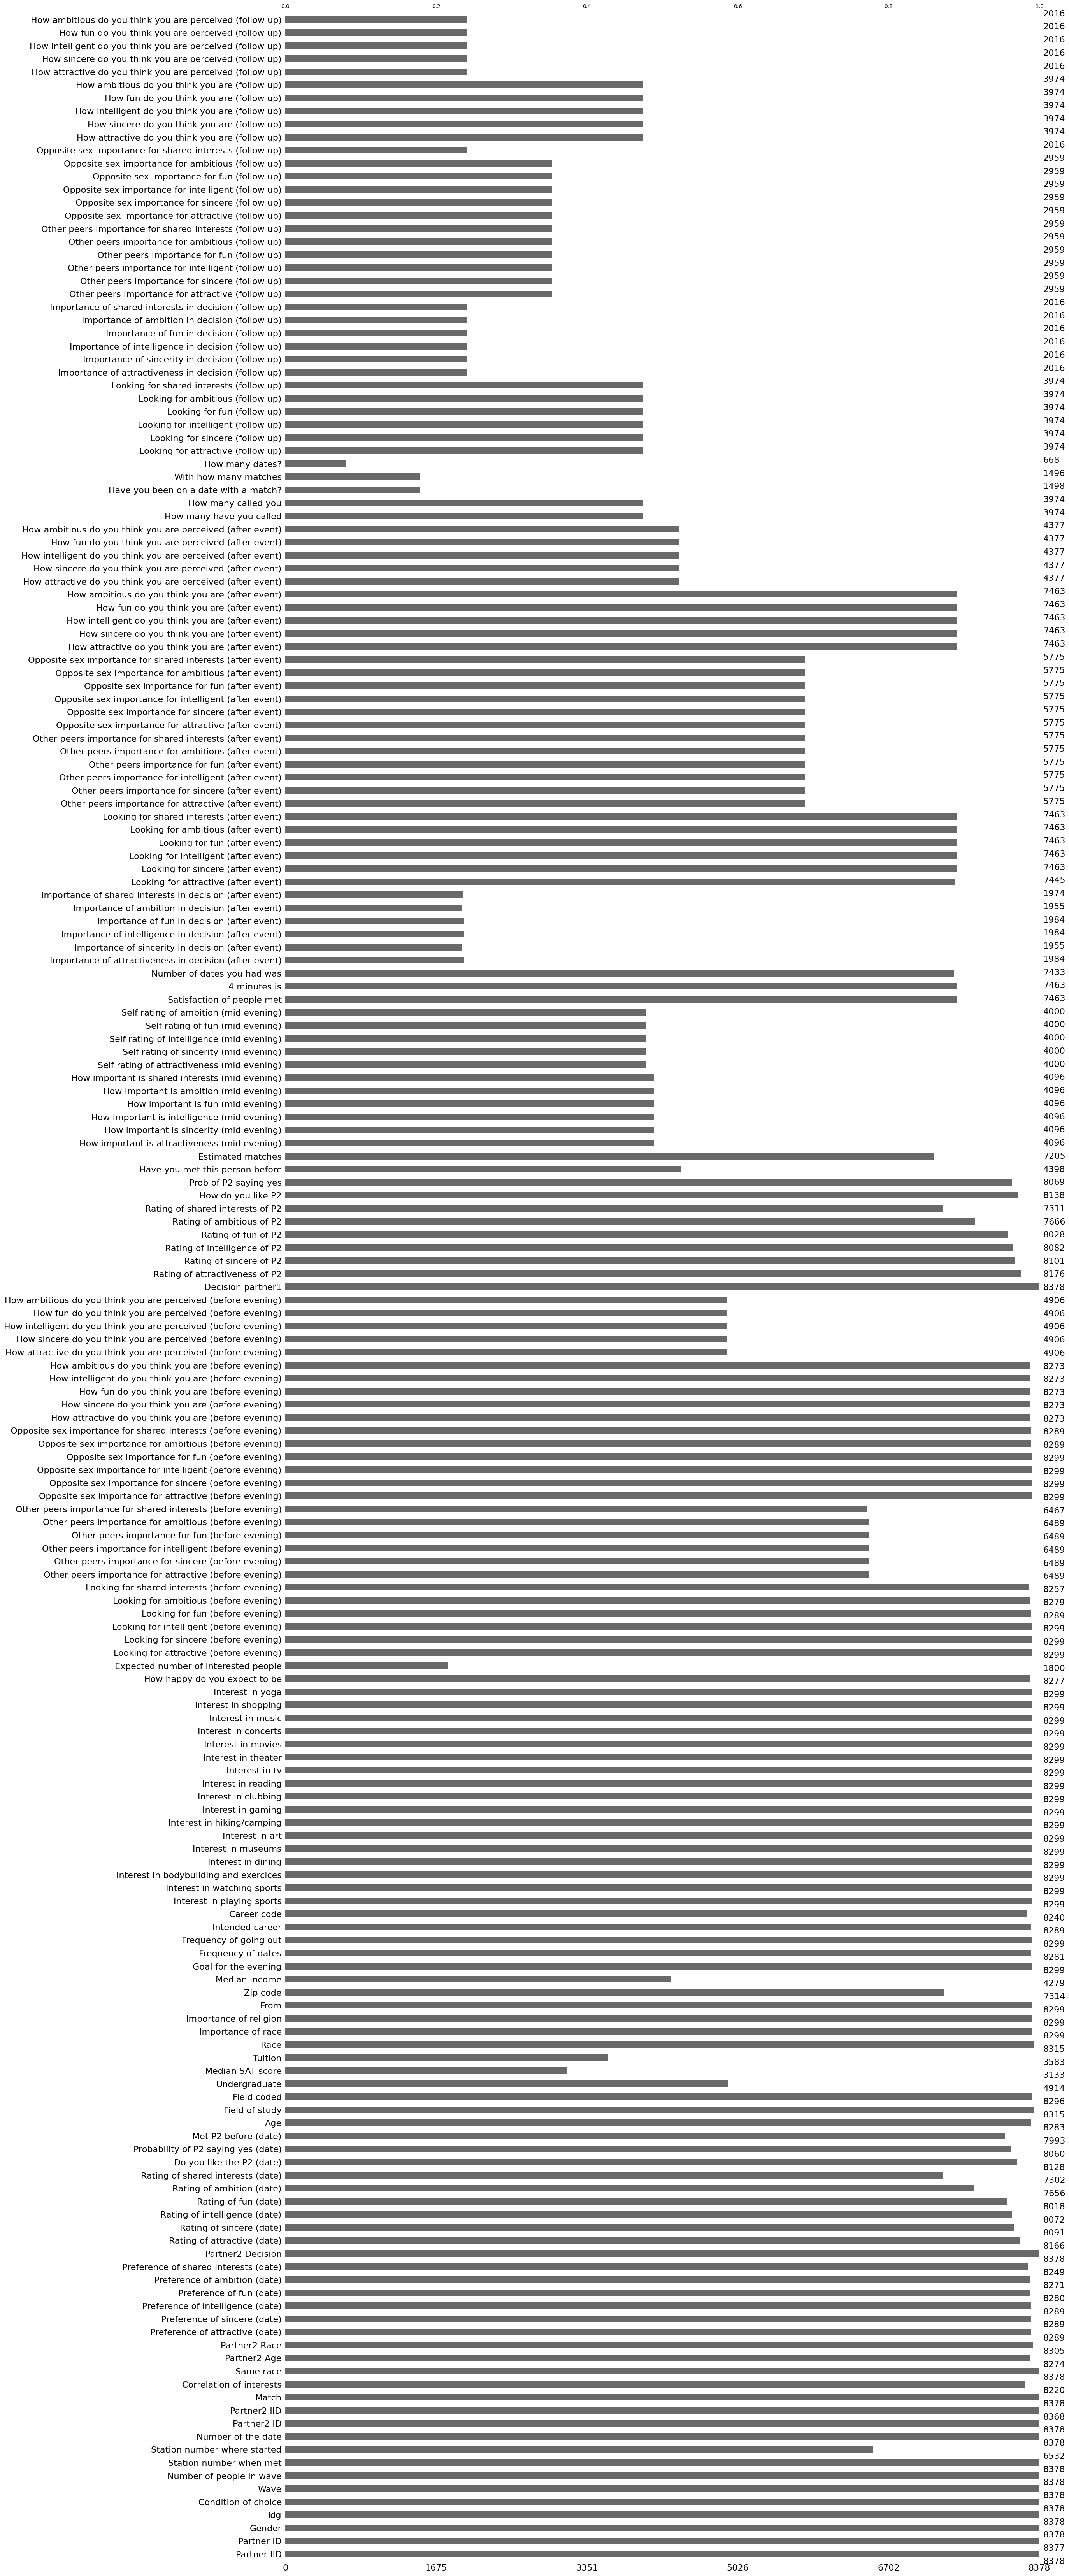

In [10]:
msno.bar(df)

SUPPRESSION DES COLONNES LORSQUE LES VALEURS MANQUANTES REPRESENTENT PLUS DE x %

In [11]:
seuil = 0.3
count=0
data_filtered = df
for i in df.columns:
    na = df[i].isna().sum()
    total = df[i].value_counts(dropna=False).sum()
    if na/total > seuil:
        data_filtered= data_filtered.drop(columns=i)
        count +=1
print("On a supprimé",count,"colonnes avec un taux de valeurs vides supérieur à",seuil*100,"%")

On a supprimé 84 colonnes avec un taux de valeurs vides supérieur à 30.0 %


In [12]:
df.to_csv("dataset_clean.csv", sep=";", index=False)

ON PEUT COMMENCER

LES INFOS DES PARTICIPANTS INDEPENDAMMENT DU DATE

Approche générale: les lignes du dataset représente un date vécu par un des deux participants. Pour pouvoir comparer les profils, il est nécessaire de retravailler la structure pour pouvoir faire des comparaisons entre les réponses de la personne 1 (P1) et celles de la personne 2 (P2). Pour ce faire, on commence par isoler les informations indépendantes du date (caractéristiques des participant-e-s), par identifier chaque date (avec un nouvel ID et les infos propres au date), puis les participations des 2 personnes concernées (avec leurs réponses).  

In [13]:
cols_infos_partner = ['Partner IID',
                      'Gender',
                      'Age',
                      'Field of study',
                      'Field coded',
                      'Undergraduate',
                      'Median SAT score',
                      'Tuition',
                      'Race',
                      'Importance of race',
                      'Importance of religion',
                      'From',
                      'Zip code',
                      'Median income',
                      'Goal for the evening',
                      'Frequency of dates',
                      'Frequency of going out',
                      'Intended career',
                      'Career code',
                      'Interest in playing sports',	
                      'Interest in watching sports',	
                      'Interest in bodybuilding and exercices',
                      'Interest in dining',	
                      'Interest in museums',
                      'Interest in art',
                      'Interest in hiking/camping',	
                      'Interest in gaming',	
                      'Interest in clubbing',	
                      'Interest in reading',	
                      'Interest in tv',
                      'Interest in theater',	
                      'Interest in movies',	
                      'Interest in concerts',	
                      'Interest in music',	
                      'Interest in shopping',
                      'Interest in yoga',	
                      'How happy do you expect to be',	
                      'Expected number of interested people',
                      'Looking for attractive (before evening)',	
                      'Looking for sincere (before evening)',
                      'Looking for intelligent (before evening)',	
                      'Looking for fun (before evening)',
                      'Looking for ambitious (before evening)',
                      'Looking for shared interests (before evening)',	
                      'Other peers importance for attractive (before evening)',	
                      'Other peers importance for sincere (before evening)',	
                      'Other peers importance for intelligent (before evening)',	
                      'Other peers importance for fun (before evening)',	
                      'Other peers importance for ambitious (before evening)',	
                      'Other peers importance for shared interests (before evening)',	
                      'Opposite sex importance for attractive (before evening)',	
                      'Opposite sex importance for sincere (before evening)',	
                      'Opposite sex importance for intelligent (before evening)',	
                      'Opposite sex importance for fun (before evening)',	
                      'Opposite sex importance for ambitious (before evening)',	
                      'Opposite sex importance for shared interests (before evening)',	
                      'How attractive do you think you are (before evening)',	
                      'How sincere do you think you are (before evening)',
                      'How fun do you think you are (before evening)',	
                      'How intelligent do you think you are (before evening)',	
                      'How ambitious do you think you are (before evening)',	
                      'How attractive do you think you are perceived (before evening)',	
                      'How sincere do you think you are perceived (before evening)',	
                      'How intelligent do you think you are perceived (before evening)',	
                      'How fun do you think you are perceived (before evening)',
                      'How ambitious do you think you are perceived (before evening)',

                      "How important is attractiveness (mid evening)",
                      "How important is sincerity (mid evening)",
                      "How important is intelligence (mid evening)",
                      "How important is fun (mid evening)",
                      "How important is ambition (mid evening)",
                      "How important is shared interests (mid evening)",

                      "Self rating of attractiveness (mid evening)",
                      "Self rating of sincerity (mid evening)",
                      "Self rating of intelligence (mid evening)",
                      "Self rating of fun (mid evening)",
                      "Self rating of ambition (mid evening)",

                      "Satisfaction of people met",
                      "4 minutes is",
                      "Number of dates you had was",

                      "Importance of attractiveness in decision (after event)",
                      "Importance of sincerity in decision (after event)",
                      "Importance of intelligence in decision (after event)",
                      "Importance of fun in decision (after event)",
                      "Importance of ambition in decision (after event)",
                      "Importance of shared interests in decision (after event)",

                      "Looking for attractive (after event)",
                      "Looking for sincere (after event)",
                      "Looking for intelligent (after event)",
                      "Looking for fun (after event)",
                      "Looking for ambitious (after event)",
                      "Looking for shared interests (after event)",

                      "Other peers importance for attractive (after event)",
                      "Other peers importance for sincere (after event)",
                      "Other peers importance for intelligent (after event)",
                      "Other peers importance for fun (after event)",
                      "Other peers importance for ambitious (after event)",
                      "Other peers importance for shared interests (after event)",

                      "Opposite sex importance for attractive (after event)",
                      "Opposite sex importance for sincere (after event)",
                      "Opposite sex importance for intelligent (after event)",
                      "Opposite sex importance for fun (after event)",
                      "Opposite sex importance for ambitious (after event)",
                      "Opposite sex importance for shared interests (after event)",

                      "How attractive do you think you are (after event)",
                      "How sincere do you think you are (after event)",
                      "How intelligent do you think you are (after event)",
                      "How fun do you think you are (after event)",
                      "How ambitious do you think you are (after event)",


                      "How attractive do you think you are perceived (after event)",
                      "How sincere do you think you are perceived (after event)",
                      "How intelligent do you think you are perceived (after event)",
                      "How fun do you think you are perceived (after event)",
                      "How ambitious do you think you are perceived (after event)",

                      "How many have you called",
                      "How many called you",
                      "Have you been on a date with a match?",
                      "With how many matches",
                      "How many dates?",

                      "Looking for attractive (follow up)",
                      "Looking for sincere (follow up)",
                      "Looking for intelligent (follow up)",
                      "Looking for fun (follow up)",
                      "Looking for ambitious (follow up)",
                      "Looking for shared interests (follow up)",

                      "Importance of attractiveness in decision (follow up)",
                      "Importance of sincerity in decision (follow up)",
                      "Importance of intelligence in decision (follow up)",
                      "Importance of fun in decision (follow up)",
                      "Importance of ambition in decision (follow up)",
                      "Importance of shared interests in decision (follow up)",

                      "Other peers importance for attractive (follow up)",
                      "Other peers importance for sincere (follow up)",
                      "Other peers importance for intelligent (follow up)",
                      "Other peers importance for fun (follow up)",
                      "Other peers importance for ambitious (follow up)",
                      "Other peers importance for shared interests (follow up)",

                      "Opposite sex importance for attractive (follow up)",
                      "Opposite sex importance for sincere (follow up)",
                      "Opposite sex importance for intelligent (follow up)",
                      "Opposite sex importance for fun (follow up)",
                      "Opposite sex importance for ambitious (follow up)",
                      "Opposite sex importance for shared interests (follow up)",

                      "How attractive do you think you are (follow up)",
                      "How sincere do you think you are (follow up)",
                      "How intelligent do you think you are (follow up)",
                      "How fun do you think you are (follow up)",
                      "How ambitious do you think you are (follow up)",


                      "How attractive do you think you are perceived (follow up)",
                      "How sincere do you think you are perceived (follow up)",
                      "How intelligent do you think you are perceived (follow up)",
                      "How fun do you think you are perceived (follow up)",
                      "How ambitious do you think you are perceived (follow up)"
                      ]

In [14]:
df_partners=df[cols_infos_partner]
df_partners=df_partners.drop_duplicates()

In [15]:
df_partners.to_csv("dataset_partners.csv", sep=";", index=False)

POUR LES INFOS DU DATE ON VEUT TOUT SAUF LES INFOS PERSO, MAIS ON VEUT CONSERVER L'IID DU PREMIER PARTICIPANT

In [16]:
cols_infos_partner.pop(0)

'Partner IID'

In [17]:
df_date=df.drop(cols_infos_partner, axis=1)

In [18]:
cols_infos_date_a_supprimer=['Partner2 Age', 'Partner2 Race']

In [19]:
df_date.drop(columns=cols_infos_date_a_supprimer,axis=1)

,Partner IID,Partner ID,idg,Condition of choice,Wave,Number of people in wave,Station number when met,Station number where started,Number of the date,Partner2 ID,Partner2 IID,Match,Correlation of interests,Same race,Preference of attractive (date),Preference of sincere (date),Preference of intelligence (date),Preference of fun (date),Preference of ambition (date),Preference of shared interests (date),Partner2 Decision,Rating of attractive (date),Rating of sincere (date),Rating of intelligence (date),Rating of fun (date),Rating of ambition (date),Rating of shared interests (date),Do you like the P2 (date),Probability of P2 saying yes (date),Met P2 before (date),Decision partner1,Rating of attractiveness of P2,Rating of sincere of P2,Rating of intelligence of P2,Rating of fun of P2,Rating of ambitious of P2,Rating of shared interests of P2,How do you like P2,Prob of P2 saying yes,Have you met this person before,Estimated matches
0,1,1,1,limited choice,1,10,7,NaN,4,1,11,No,0.14,No,35.00,20.00,20.00,20.00,0.00,5.00,No,6.00,8.00,8.00,8.00,8.00,6.00,7.00,4.00,2,Yes,6.00,9.00,7.00,7.00,6.00,5.00,7.00,6.00,None,4.00
1,1,1,1,limited choice,1,10,7,NaN,3,2,12,No,0.54,No,60.00,0.00,0.00,40.00,0.00,0.00,No,7.00,8.00,10.00,7.00,7.00,5.00,8.00,4.00,2,Yes,7.00,8.00,7.00,8.00,5.00,6.00,7.00,5.00,Yes,4.00
2,1,1,1,limited choice,1,10,7,NaN,10,3,13,Yes,0.16,Yes,19.00,18.00,19.00,18.00,14.00,12.00,Yes,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,1,Yes,5.00,8.00,9.00,8.00,5.00,7.00,7.00,NaN,Yes,4.00
3,1,1,1,limited choice,1,10,7,NaN,5,4,14,Yes,0.61,No,30.00,5.00,15.00,40.00,5.00,5.00,Yes,7.00,8.00,9.00,8.00,9.00,8.00,7.00,7.00,2,Yes,7.00,6.00,8.00,7.00,6.00,8.00,7.00,6.00,None,4.00
4,1,1,1,limited choice,1,10,7,NaN,7,5,15,Yes,0.21,No,30.00,10.00,20.00,10.00,10.00,20.00,Yes,8.00,7.00,9.00,6.00,9.00,7.00,8.00,6.00,2,Yes,5.00,6.00,7.00,7.00,6.00,6.00,6.00,6.00,None,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22,44,extensive choice,21,22,14,10,5,18,526,No,0.64,No,10.00,10.00,30.00,20.00,10.00,15.00,Yes,10.00,5.00,3.00,2.00,6.00,5.00,6.00,1.00,NaN,No,3.00,5.00,5.00,5.00,NaN,NaN,2.00,5.00,No,3.00
8374,552,22,44,extensive choice,21,22,13,10,4,19,527,No,0.71,No,50.00,20.00,10.00,5.00,10.00,5.00,No,6.00,3.00,7.00,3.00,7.00,2.00,2.00,2.00,2,No,4.00,6.00,8.00,4.00,4.00,NaN,4.00,4.00,No,3.00
8375,552,22,44,extensive choice,21,22,19,10,10,20,528,No,-0.46,No,40.00,10.00,30.00,10.00,10.00,NaN,No,2.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,2,No,4.00,7.00,8.00,8.00,8.00,NaN,6.00,5.00,No,3.00
8376,552,22,44,extensive choice,21,22,3,10,16,21,529,No,0.62,No,10.00,25.00,25.00,10.00,10.00,20.00,Yes,5.00,7.00,5.00,5.00,3.00,6.00,6.00,4.00,2,No,4.00,6.00,5.00,4.00,NaN,5.00,5.00,5.00,No,3.00


DANS LA WAVE 5 IL Y A EU DES DATES QUI N'ONT PAS PU AVOIR LIEU (SANS PARTNER2)

In [20]:
df_date[df_date["Partner2 IID"].isna()].shape

(10, 43)

ON LES SUPPRIME DONC POUR GARDER UNIQUEMENT LES DATES AVEC DEUX PERSONNES

In [21]:
df_date=df_date[~df_date["Partner2 IID"].isna()]

ON VEUT IDENTIFIER LES DATES DE MANIERE UNIQUE POUR NE PAS AVOIR DE DOUBLONS DANS LE DATASET FINAL

On prend une combinaison des deux ID triés car chaque ID est unique et 2 personnes ne se rencontrent qu'une fois

In [22]:
def unique_id(x1,x2):
    if x1>x2:
        return str(x1)+"-"+str(x2)
    else:
        return str(x2)+"-"+str(x1)

In [23]:
df_date["Date ID"]=df_date.apply(lambda x : unique_id(x['Partner IID'],x['Partner2 IID']), axis=1)

In [24]:
df_date = df_date.drop(['Partner2 ID','idg','Partner ID','Partner2 Decision'], axis=1)

ON SEPARE LA TABLE EN DEUX, LES INFOS PROPRE A L'ORGANISATION DU DATE + LES VECUS DES PARTICIPANT-E-S

In [25]:
cols_infos_date = ['Date ID','Partner IID','Partner2 IID','Condition of choice','Wave',
       'Number of people in wave', 'Station number when met','Match','Correlation of interests','Same race']

In [26]:
df_infos_base_date = df_date[cols_infos_date]

In [27]:
cols_infos_date.pop(0)
cols_infos_date.pop(0)
cols_infos_date.pop(0)


'Partner2 IID'

Pour l'autre table on prend les valeurs restantes (= on supprime les colonnes gardées dans la première table)

In [28]:
df_infos_perso_date = df_date.drop(columns=cols_infos_date)

In [29]:
df_infos_base_date.head()

,Date ID,Partner IID,Partner2 IID,Condition of choice,Wave,Number of people in wave,Station number when met,Match,Correlation of interests,Same race
0,11-1,1,11,limited choice,1,10,7,No,0.14,No
1,12-1,1,12,limited choice,1,10,7,No,0.54,No
2,13-1,1,13,limited choice,1,10,7,Yes,0.16,Yes
3,14-1,1,14,limited choice,1,10,7,Yes,0.61,No
4,15-1,1,15,limited choice,1,10,7,Yes,0.21,No


In [30]:
df_infos_base_date=df_infos_base_date.drop_duplicates(subset='Date ID', keep='first')

ON FAIT UN PIVOT POUR AVOIR LES DEUX FEEDBACK DU DATE (DE P1 / DE P2) SUR UNE LIGNE

In [31]:
df_infos_perso_date=df_infos_perso_date.sort_values('Date ID')
df_infos_perso_date['row'] = df_infos_perso_date.groupby('Date ID').cumcount() + 1

pivot_columns = [col for col in df_infos_perso_date.columns if col not in ['Date ID', 'row']]
df_pivot = df_infos_perso_date.pivot(index='Date ID', columns='row', 
                     values=pivot_columns)

# On veut qu'un seul niveau de colonnes
df_pivot.columns = [f"{col[0]}_P{col[1]}" for col in df_pivot.columns]

df_pivot = df_pivot.reset_index()


In [32]:
df_pivot.shape

(4184, 65)

In [33]:
df_pivot.head()

,Date ID,Partner IID_P1,Partner IID_P2,Station number where started_P1,Station number where started_P2,Number of the date_P1,Number of the date_P2,Partner2 IID_P1,Partner2 IID_P2,Partner2 Age_P1,Partner2 Age_P2,Partner2 Race_P1,Partner2 Race_P2,Preference of attractive (date)_P1,Preference of attractive (date)_P2,Preference of sincere (date)_P1,Preference of sincere (date)_P2,Preference of intelligence (date)_P1,Preference of intelligence (date)_P2,Preference of fun (date)_P1,Preference of fun (date)_P2,Preference of ambition (date)_P1,Preference of ambition (date)_P2,Preference of shared interests (date)_P1,Preference of shared interests (date)_P2,Rating of attractive (date)_P1,Rating of attractive (date)_P2,Rating of sincere (date)_P1,Rating of sincere (date)_P2,Rating of intelligence (date)_P1,Rating of intelligence (date)_P2,Rating of fun (date)_P1,Rating of fun (date)_P2,Rating of ambition (date)_P1,Rating of ambition (date)_P2,Rating of shared interests (date)_P1,Rating of shared interests (date)_P2,Do you like the P2 (date)_P1,Do you like the P2 (date)_P2,Probability of P2 saying yes (date)_P1,Probability of P2 saying yes (date)_P2,Met P2 before (date)_P1,Met P2 before (date)_P2,Decision partner1_P1,Decision partner1_P2,Rating of attractiveness of P2_P1,Rating of attractiveness of P2_P2,Rating of sincere of P2_P1,Rating of sincere of P2_P2,Rating of intelligence of P2_P1,Rating of intelligence of P2_P2,Rating of fun of P2_P1,Rating of fun of P2_P2,Rating of ambitious of P2_P1,Rating of ambitious of P2_P2,Rating of shared interests of P2_P1,Rating of shared interests of P2_P2,How do you like P2_P1,How do you like P2_P2,Prob of P2 saying yes_P1,Prob of P2 saying yes_P2,Have you met this person before_P1,Have you met this person before_P2,Estimated matches_P1,Estimated matches_P2
0,11-1,1,11,NaN,NaN,4,4,11,1,27,21,2,4,35.00,15.00,20.00,20.00,20.00,20.00,20.00,15.00,0.00,15.00,5.00,15.00,6.00,6.00,8.00,9.00,8.00,7.00,8.00,7.00,8.00,6.00,6.00,5.00,7.00,7.00,4.00,6.00,2,2,Yes,No,6.00,6.00,9.00,8.00,7.00,8.00,7.00,8.00,6.00,8.00,5.00,6.00,7.00,7.00,6.00,4.00,None,None,4.00,0.00
1,11-10,11,10,NaN,NaN,9,9,10,11,26,27,2,2,15.00,35.00,15.00,20.00,15.00,20.00,40.00,20.00,10.00,0.00,5.00,5.00,6.00,7.00,10.00,8.00,10.00,7.00,6.00,8.00,6.00,6.00,NaN,5.00,6.00,6.00,3.00,3.00,2,2,No,No,7.00,6.00,8.00,10.00,7.00,10.00,8.00,6.00,6.00,6.00,5.00,NaN,6.00,6.00,3.00,3.00,None,None,0.00,NaN
2,12-1,12,1,NaN,NaN,3,3,1,12,21,22,4,2,15.00,60.00,20.00,0.00,20.00,0.00,15.00,40.00,15.00,0.00,15.00,0.00,7.00,7.00,8.00,8.00,7.00,10.00,8.00,7.00,5.00,7.00,6.00,5.00,7.00,8.00,5.00,4.00,1,2,No,Yes,7.00,7.00,8.00,8.00,10.00,7.00,7.00,8.00,7.00,5.00,5.00,6.00,8.00,7.00,4.00,5.00,None,Yes,3.00,4.00
3,12-10,12,10,NaN,NaN,8,8,10,12,26,22,2,2,15.00,60.00,15.00,0.00,15.00,0.00,40.00,40.00,10.00,0.00,5.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1,2,No,No,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,None,Yes,3.00,NaN
4,122-112,112,122,NaN,NaN,8,8,122,112,22,20,6,6,40.00,15.00,15.00,15.00,10.00,20.00,20.00,25.00,5.00,10.00,10.00,15.00,9.00,7.00,9.00,7.00,9.00,7.00,9.00,9.00,9.00,7.00,9.00,8.00,9.00,8.00,7.00,8.00,2,2,Yes,Yes,7.00,9.00,7.00,9.00,7.00,9.00,9.00,9.00,7.00,9.00,8.00,9.00,8.00,9.00,8.00,7.00,None,None,8.00,4.00


ON FAIT UNE JOINTURE AVEC LA TABLE DES INFOS DE BASE DES DATES

In [34]:
df_total= df_infos_base_date.merge(df_pivot,on='Date ID')

In [35]:
df_total_avec_infos_p1= df_total.merge(df_partners,left_on='Partner IID_P1', right_on='Partner IID', )

In [36]:
df_total_avec_infos_p1_et_p2= df_total_avec_infos_p1.merge(df_partners,left_on='Partner IID_P2', right_on='Partner IID',suffixes=['_P1','_P2'])

In [37]:
cols_a_supprimer=['Partner IID_x', 'Partner2 IID','Partner IID_y','Partner IID']
df_total_avec_infos_p1_et_p2=df_total_avec_infos_p1_et_p2.drop(columns=cols_a_supprimer)

In [38]:
df_total_avec_infos_p1_et_p2.to_csv('dataset_couple.csv', sep=";", index=False)